<a href="https://colab.research.google.com/github/Anupam-Durutkar/Exploratory-Analysis-On-Play-Store-Apps/blob/main/Nootbook_Exploratory_Analysis_On_Play_Store_Apps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prject Qustion**

---


## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

---

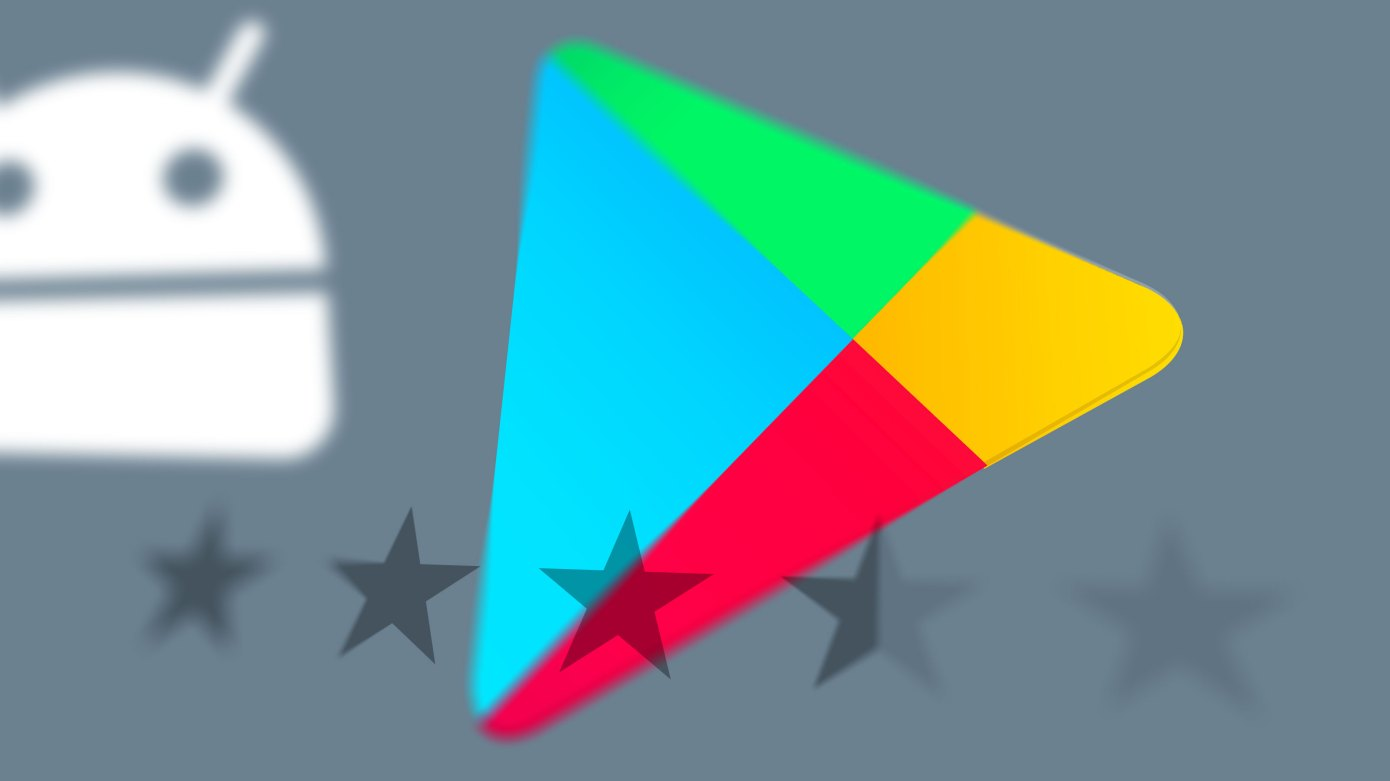

# **Introduction to data**

---

Mobile apps are everywhere. They are easy to create and can be money making. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.

Let's take a look at the data, which consists of two files:

**datasets/play_store_data.csv**

This file contains all the details of the apps on Google Play. There are 13 features that describe a given app.
* **App:** Name of the app
* **Category**: Category of the app. Some examples are: ART_AND_DESIGN, FINANCE, COMICS, BEAUTY etc.
* **Rating:** The current average rating (out of 5) of the app on Google Play
* **Reviews:** Number of user reviews given on the app
* **Size:** Size of the app in MB (megabytes)
* **Installs:** Number of times the app was downloaded from Google Play
* **Type:** Whether the app is paid or free
* **Price:** Price of the app in US$
* **Content Rating:** A content rating (also known as maturity rating) rates the suitability of TV broadcasts, movies, comic books, or video games to its audience.To show which age group is suitable to view media and entertainment.
* **Genres:** A category of artistic, musical, or literary composition characterized by a particular style, form, or content
* **Last Updated:** Date on which the app was last updated on Google Play
* **Current Ver:** Current Version means a version of the software that is currently being supported by its publisher.
* **Android Ver:** Android versions (codenames) are used to describe the various updates for the open source Android mobile operating system.

**datasets/user_reviews.csv**

This file contains a random sample of 100 [most helpful first](https://play.google.com/about/comment-posting-policy/) user reviews for each app. The distribution of positive and negative reviews in each category has been pre-processed and passed through a sentiment analyzer.
* **App:** Name of the app on which the user review was provided. Matches the `App` column of the `play_store_data.csv` file
* **Translated Review:** The pre-processed user review text.
* **Sentiment:** Sentiment category of the user review - Positive, Negative or Neutral.
* **Sentiment Polarity:** Sentiment score of the user review. It lies between [-1,1]. A higher score denotes a more positive sentiment.

# **Importing required packages**

---

In [3]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
from matplotlib import pyplot as plt # visualization tool
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import plotly # visualization tool
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go # visualization tool

import plotly.express as px

import plotly.io as iplot
iplot.renderers.default = 'colab' # for visualization google colab

import warnings
warnings.filterwarnings('ignore')

# Mounted Google Drive

---

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#**Importing Dataset** 

---


#### Read the datasets into dataframes

In [7]:
play_store_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project_folder/Capstone Project - Exploratory Data Analysis/Play Store Data.csv")
user_ratings_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project_folder/Capstone Project - Exploratory Data Analysis/User Reviews.csv" ,encoding='utf8')

##Copying the database for comparison Original and clean version
play_store_df_original = play_store_df.copy()
play_store_df_original.shape

(10841, 13)

In [8]:
## Display the Play Store App data
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
## Display the User Ratings data
user_ratings_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


# Explore the structure of the datasets

---

In [10]:
## Play Store App Data
print(f"The length of the 'play_store_df' datasets is: {len(play_store_df)}")
print(f"The total number of rows and columns in play_store_df datasets is:{play_store_df.shape}")
print(f"The total number of unique Apps in play_store_df datasets is:{play_store_df['App'].nunique()}")

The length of the 'play_store_df' datasets is: 10841
The total number of rows and columns in play_store_df datasets is:(10841, 13)
The total number of unique Apps in play_store_df datasets is:9660


In [11]:
## User Reviews Data
print(f"The length of the user_ratings_df datasets is:",len(user_ratings_df))
print(f"The total number of rows and columns in user_ratings_df datasets is",user_ratings_df.shape)
print(f"The total number of unique Apps in user_ratings_df datasets is",user_ratings_df["App"].nunique())

The length of the user_ratings_df datasets is: 64295
The total number of rows and columns in user_ratings_df datasets is (64295, 5)
The total number of unique Apps in user_ratings_df datasets is 1074


In [12]:
#The described method will help to see how data has been spread for numerical values.
#We can clearly see the minimum value, mean values, different percentile values, and maximum values.
play_store_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9367.0,NaN,NaN,NaN,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
user_ratings_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,64295,1074,Angry Birds Classic,320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Translated_Review,37427,27994,Good,247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sentiment,37432,3,Positive,23998,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sentiment_Polarity,37432.0,NaN,NaN,NaN,0.182146,0.351301,-1.0,0.0,0.15,0.4,1.0
Sentiment_Subjectivity,37432.0,NaN,NaN,NaN,0.492704,0.259949,0.0,0.357143,0.514286,0.65,1.0


# Data Cleaning

---

## 1. Handling the Null values in dataset

The first step is to detect the count/percentage of missing values in every column of the dataset. This will give an idea about the distribution of missing values.

In [14]:
## Let's get the ratio of missing values for each feature
## Creating Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(2)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [15]:
missing_values_table(play_store_df)

Your selected dataframe has 13 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
Rating,1474,13.60
Current Ver,8,0.07
Android Ver,3,0.03
Type,1,0.01
Content Rating,1,0.01


In [16]:
## Drop the Null values in Rating column
play_store_df.dropna(subset =['Rating'], inplace = True)
print(f"The number of rows and columns in play_store_df before is {play_store_df_original.shape} and after dropping the NAs from 'Rating' is {play_store_df.shape}")

The number of rows and columns in play_store_df before is (10841, 13) and after dropping the NAs from 'Rating' is (9367, 13)


In [17]:
## Recalculate the missing value ratio
missing_values_table(play_store_df)

Your selected dataframe has 13 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Current Ver,4,0.04
Android Ver,3,0.03
Content Rating,1,0.01


Since the ratio of missing values for the rest of the columns is less (<0.05), we proceed to fill these with the mode values instead of dropping these rows.

In [18]:
## Fill the three columns with the mode value
play_store_df['Current Ver'] = play_store_df['Current Ver'].fillna(play_store_df['Current Ver'].mode()[0])
play_store_df['Android Ver'] = play_store_df['Android Ver'].fillna(play_store_df['Android Ver'].mode()[0])
play_store_df['Content Rating'] = play_store_df['Content Rating'].fillna(play_store_df['Content Rating'].mode()[0])

missing_values_table(play_store_df)

Your selected dataframe has 13 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


## 2. Handling Duplicates

In [19]:
## Drop the duplicates from the "App" column
play_store_df.drop_duplicates(subset='App', inplace=True)
print(f"The number of rows and columns in play_store_df before is {play_store_df_original.shape} and after dropping the duplicates is {play_store_df.shape}")

The number of rows and columns in play_store_df before is (10841, 13) and after dropping the duplicates is (8197, 13)


## 3. Quick Check for Outliers

On studying the dataset further, it was found that there was a data with some kind of weird anomaly. Let us find out the row in the data and purge it.

In [20]:
play_store_df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,  3. ,
        1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,  1.8,
        2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [21]:
play_store_df[play_store_df['Rating'] == 19.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


As we can see that this entry of our dataset is having a Rating of 19.0 which is way higher than the maximum rating of 5.0. Also, The value in the Reviews column has an alphabet which makes it a lone entry to have so. Hence we are removing this particular row to make our analysis easier.

In [22]:
## Drop the row that has incorrect values for our features
play_store_df = play_store_df[~(play_store_df['Installs'] == "Free")].reset_index(drop=True)

## 4. Checks and Convert the Following columns for EDA analysis
As some of feature columns are non-numerical value so let's convert the categorical variables the into numerical for ease of analysis.

###**Installs**

In [23]:
play_store_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [24]:
## Remove '+' and ',' from 'Installs' to make it numeric
play_store_df['Installs'] = play_store_df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
play_store_df['Installs'] = play_store_df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
play_store_df['Installs'] = play_store_df['Installs'].apply(lambda x: int(x))

In [25]:
play_store_df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1])

###**Size**

In [26]:
play_store_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [27]:
## 'Size' column - convert Mbs to kbs
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

###**Price & Reviews**

In [28]:
play_store_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [29]:
## Remove "$" from "Price" columns to make it numeric
play_store_df['Price'] = play_store_df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))

In [30]:
## Convert the column types to numeric values
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: float(x))
play_store_df['Installs'] = play_store_df['Installs'].apply(lambda x: float(x))
play_store_df['Price'] = play_store_df['Price'].apply(lambda x: float(x))
play_store_df['Reviews'] = play_store_df['Reviews'].apply(lambda x: int(x))

In [31]:
## Display the dtypes of all the features in our dataset
play_store_df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [32]:
play_store_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,8196,8196,Photo Editor & Candy Camera & Grid & ScrapBook,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,8196,33,FAMILY,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,8196.0,NaN,NaN,NaN,4.173243,0.536625,1.0,4.0,4.3,4.5,5.0
Reviews,8196.0,NaN,NaN,NaN,255251.470717,1985593.848036,1.0,126.0,3004.0,43813.0,78158306.0
Size,7027.0,NaN,NaN,NaN,21.754427,22.726503,0.0085,4.9,13.0,31.0,100.0
Installs,8196.0,NaN,NaN,NaN,9165089.719131,58250865.453942,1.0,10000.0,100000.0,1000000.0,1000000000.0
Type,8196,2,Free,7592,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,8196.0,NaN,NaN,NaN,1.037884,16.857882,0.0,0.0,0.0,0.0,400.0
Content Rating,8196,6,Everyone,6618,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,8196,114,Tools,717,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Extracting statistics from the dataset


---

* Finding the Numerical And Categorical Columns
* Looking at the dataset, we think we can identify the categorical and continuous columns in it. But it might also be possible that the numerical values are represented as strings in some feature. Or the categorical values in some features might be represented as some other datatypes instead of strings. Hence it's good to check for the datatypes of all the feature

In [33]:
# IDENTIFYING NUMERICAL FEATURES

numeric_data = play_store_df.select_dtypes(include=np.number) # select_dtypes selects data with numeric features
numeric_col = numeric_data.columns                                                                

# we will store the numeric features in a variable

print("Numeric Features:", numeric_data.shape)
numeric_data.describe(include='all').T

Numeric Features: (8196, 5)


,count,mean,std,min,25%,50%,75%,max
Rating,8196.0,4.173243e+00,5.366247e-01,1.0000,4.0,4.3,4.5,5.000000e+00
Reviews,8196.0,2.552515e+05,1.985594e+06,1.0000,126.0,3004.0,43813.0,7.815831e+07
Size,7027.0,2.175443e+01,2.272650e+01,0.0085,4.9,13.0,31.0,1.000000e+02
Installs,8196.0,9.165090e+06,5.825087e+07,1.0000,10000.0,100000.0,1000000.0,1.000000e+09
Price,8196.0,1.037884e+00,1.685788e+01,0.0000,0.0,0.0,0.0,4.000000e+02


In [34]:
# IDENTIFYING CATEGORICAL FEATURES

cat_data = play_store_df.select_dtypes(exclude=np.number) # select_dtypes selects data with non-numeric features
cat_col = cat_data.columns                                                                

# we will store the non-numeric features in a variable

print("Non-Numeric Features:", cat_data.shape)
cat_data.describe(include='all').T

Non-Numeric Features: (8196, 8)


,count,unique,top,freq
App,8196,8196,Photo Editor & Candy Camera & Grid & ScrapBook,1
Category,8196,33,FAMILY,1608
Type,8196,2,Free,7592
Content Rating,8196,6,Everyone,6618
Genres,8196,114,Tools,717
Last Updated,8196,1300,"August 3, 2018",245
Current Ver,8196,2624,Varies with device,1015
Android Ver,8196,31,4.1 and up,1813


# Exploratory Data Analysis (EDA)

----

Plot a pairwise plot between all the quantitative variables to look for any evident patterns or relationships between the features

Text(0.5, 1.02, 'Pairwise Plot - Rating, Size, Installs, Reviews')

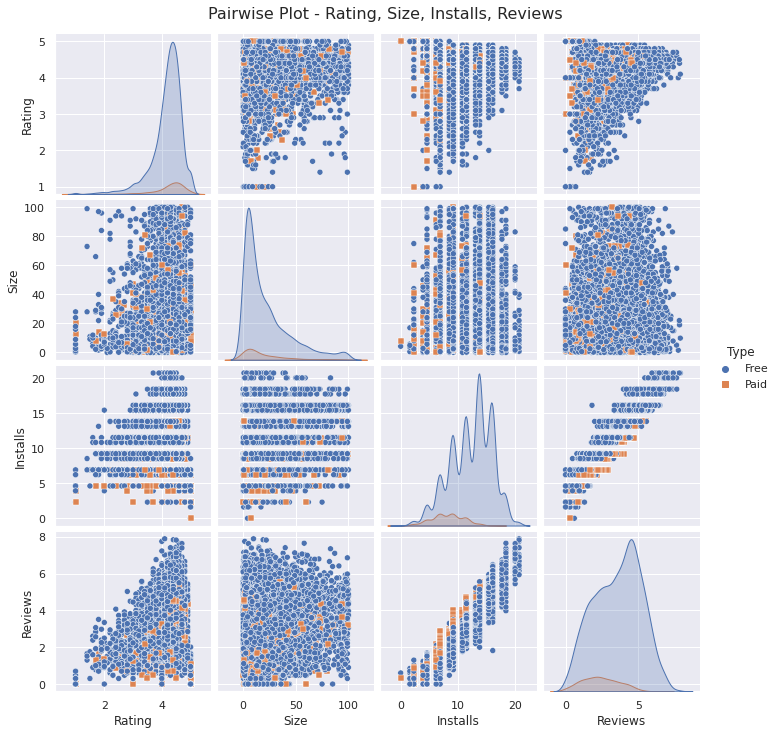

In [35]:
r = play_store_df['Rating'].dropna()
s = play_store_df['Size'].dropna()
i = play_store_df['Installs'].dropna()
rev = play_store_df['Reviews'].dropna()
t = play_store_df['Type'].dropna()
#price = play_store_df['Price']

p = sns.pairplot(pd.DataFrame(list(zip(r, s, np.log(i), np.log10(rev), t)), 
                        columns=['Rating','Size', 'Installs', 'Reviews','Type']), hue='Type', markers=["o", "s"])
p.fig.suptitle("Pairwise Plot - Rating, Size, Installs, Reviews", y=1.02, fontsize=16)



---



### Is there any difference between the category column and genres?

In [36]:
play_store_df[["Category","Genres"]]

,Category,Genres
0,ART_AND_DESIGN,Art & Design
1,ART_AND_DESIGN,Art & Design;Pretend Play
2,ART_AND_DESIGN,Art & Design
3,ART_AND_DESIGN,Art & Design
4,ART_AND_DESIGN,Art & Design;Creativity
...,...,...
8191,FAMILY,Education
8192,FAMILY,Education
8193,FAMILY,Education
8194,BOOKS_AND_REFERENCE,Books & Reference


Yes, It looks like they are slightly different



---



### 1. Does the size of the app affect the ratings and number of installs?
Let's now examine app size, review and rating. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.



Text(0.5, 1.02, 'Rating vs Size of Apps')

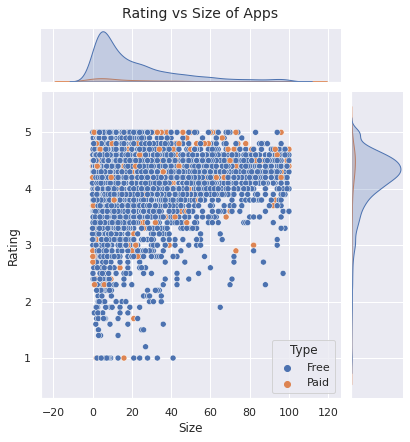

In [37]:
sns.set_style("darkgrid")

ax = sns.jointplot(data=play_store_df, x= "Size", y = "Rating" , hue="Type")
ax.fig.suptitle("Rating vs Size of Apps", y = 1.02, fontsize=14 )

In [38]:
# Size distribution of top rated apps (>= 4.5) 
play_store_df_top_rated = play_store_df[play_store_df["Rating"]>=4.5]
size_distribution = [go.Histogram(x = play_store_df_top_rated.Size)]
print('Average size of top rated apps = ', np.mean(play_store_df_top_rated['Size']))
#plotly.offline.iplot(sizing_distribution, filename='overall_sizing_distribution')
layout =dict(title = 'Average Size of top rated apps(>= 4.5)',
             xaxis = dict(title = 'Size of Apps'),
             yaxis = dict(title = 'Distribution'),
             )
sizing_distribution = dict(data = size_distribution, layout = layout)
plotly.offline.iplot(sizing_distribution, filename='overall_sizing_distribution')

Average size of top rated apps =  21.80610577798002



**`Finding:`**
* We find that the majority of top-rated apps (rating over 4) range from 2 MB to 20 MB. We also find that the vast majority of apps are free as compared to paid apps.
* Most top rated apps are optimally sized between ~2MB to ~40MB - neither too light nor too higher in size.



---



### 2. Which category has the higher in size apps and how are they rated?



In [39]:
X = play_store_df.groupby("Category")["App"].count().sort_values(ascending=False).reset_index().head(10)
X

,Category,App
0,FAMILY,1608
1,GAME,912
2,TOOLS,718
3,FINANCE,302
4,LIFESTYLE,301
5,PRODUCTIVITY,301
6,PERSONALIZATION,298
7,MEDICAL,290
8,BUSINESS,263
9,PHOTOGRAPHY,263


Text(0.5, 1.0, 'Count of Bulky Apps per Category')

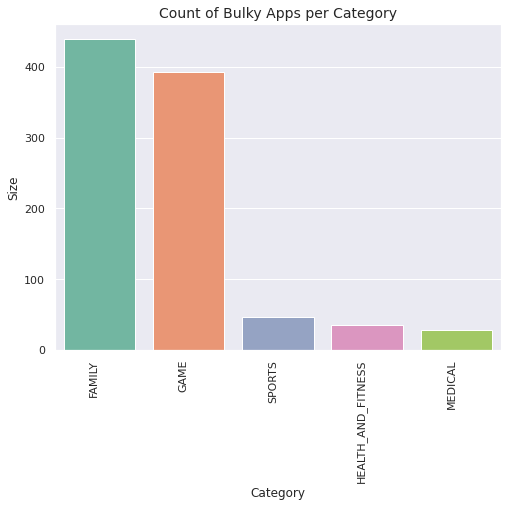

In [40]:
bulky_apps = play_store_df[play_store_df["Size"]>40]
group_category = bulky_apps.groupby("Category")["Size"].count().sort_values(ascending=False).reset_index().head()

plt.figure(figsize=(8, 6))
# sns.set(font_scale=1)
sns.set_style("darkgrid")
ax = sns.barplot(x="Category", y="Size", data=group_category, palette = "Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Count of Bulky Apps per Category',size = 14)

In [41]:
subset_df = play_store_df[play_store_df.Size > 40]
groups_temp = subset_df.groupby('Category').filter(lambda x: len(x) >20)

data = [{
    'x': groups_temp.loc[subset_df.Category==category[1]]['Rating'], 
    'type':'scatter',
    'y' : subset_df['Size'],
    'name' : str(category[1]),
    'mode' : 'markers',
    'showlegend': True,
    } for category in enumerate(['GAME', 'FAMILY'])]

layout = {'title':"Rating vs Size", 
          'xaxis': {'title' : 'Rating'},
          'yaxis' : {'title' : 'Size (in MB)'},
         'plot_bgcolor': 'rgb(150,177,220)'}

plotly.offline.iplot({'data': data, 'layout': layout})

**`Finding`**
* Most higher in size apps ( >50MB) belong to the Game and Family category.
* The higher in size apps are fairly highly rated indicating that they are higher in size for a purpose.



---



### 3. Does the sizes of paid apps and free apps vary?


In [42]:
paid_apps = play_store_df[play_store_df.Type == 'Paid']

data = [{
    'x' : paid_apps['Rating'],
    'type':'scatter',
    'y' : paid_apps['Size'],
    'mode' : 'markers',
    'text' : play_store_df['Size'],
    } for t in set(paid_apps.Type)]


layout = {'title':"Rating vs Size for Paid Apps", 
          'xaxis': {'title' : 'Rating'},
          'yaxis' : {'title' : 'Size (in MB)'},
         'plot_bgcolor': '#FFFFFF'}

plotly.offline.iplot({'data': data, 'layout': layout})


**`Finding`**
* Majority of the paid apps that are highly rated have small sizes. This means that most paid apps are designed and developed to cater to specific functionalities and hence are not in higher size.
* Users prefer to pay for apps that are light-weighted. A paid app that is higher in size may not perform well in the market.



---



### 4. Does the App prices affect rating and number of installs?


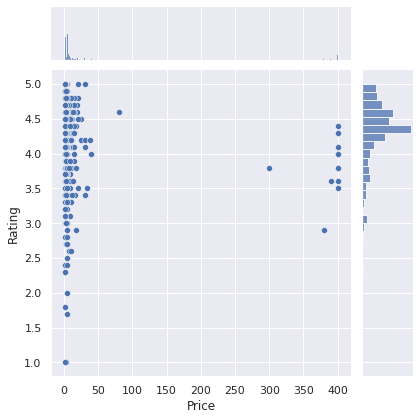

In [43]:
paid_apps = play_store_df[play_store_df.Price>0]
p = sns.jointplot( "Price", "Rating", paid_apps)

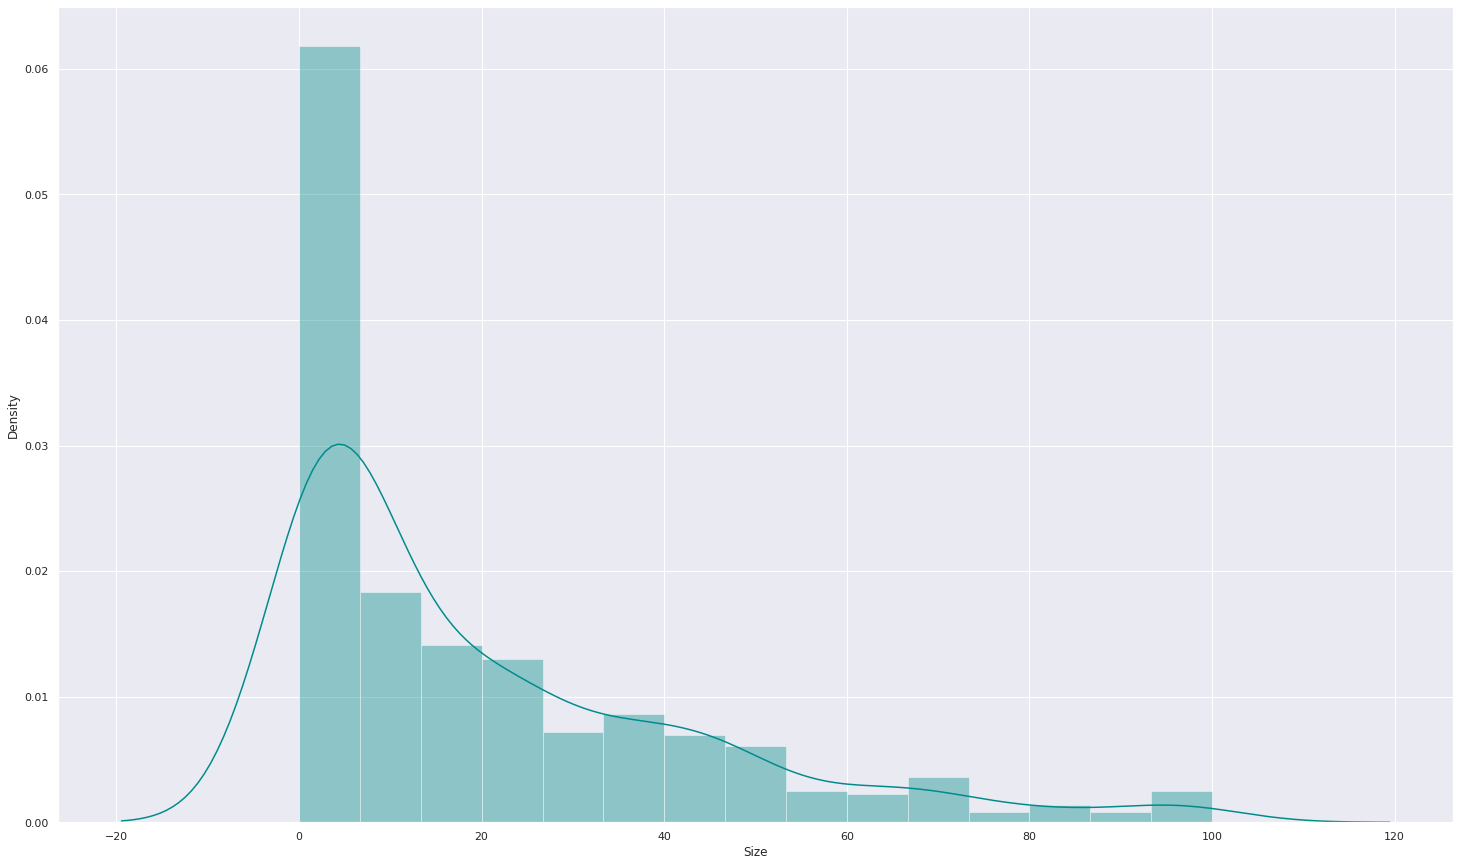

In [44]:
size_paid_apps = paid_apps['Size'].dropna()
ax = sns.distplot(size_paid_apps, color="darkcyan")


**`Finding`**
* Most top rated apps are optimally priced between ~1$ to ~30$. There are only a very few apps priced above 20$.

---



### 5. How is the Price trend across category


Text(0.5, 1.0, 'App pricing trend across categories')

<Figure size 864x432 with 0 Axes>

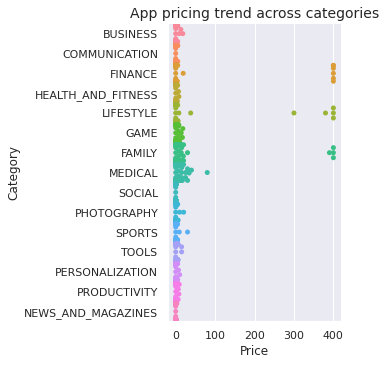

In [45]:
top_categories = play_store_df[play_store_df.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE',
                                 'LIFESTYLE','BUSINESS','PRODUCTIVITY','PERSONALIZATION','SPORTS','COMMUNICATION',
                                                        'HEALTH_AND_FITNESS','NEWS_AND_MAGAZINES','SOCIAL'])]

plt.figure(figsize=(12, 6))
sns.set(font_scale=1)
sns.set_style("darkgrid")
ax = sns.catplot(x="Price", y="Category", kind="swarm", data=top_categories)
plt.title('App pricing trend across categories',size = 14)


### 6. How is the Rating Distribution



In [46]:
## general distribution of rating
rating_distribution = [go.Histogram(
        x = play_store_df.Rating,
        xbins = {'start': 1, 'size': 0.1, 'end' :5}
)]

print('Average app rating = ', np.mean(play_store_df['Rating']))
plotly.offline.iplot(rating_distribution, filename='overall_rating_distribution')

Average app rating =  4.173243045387998


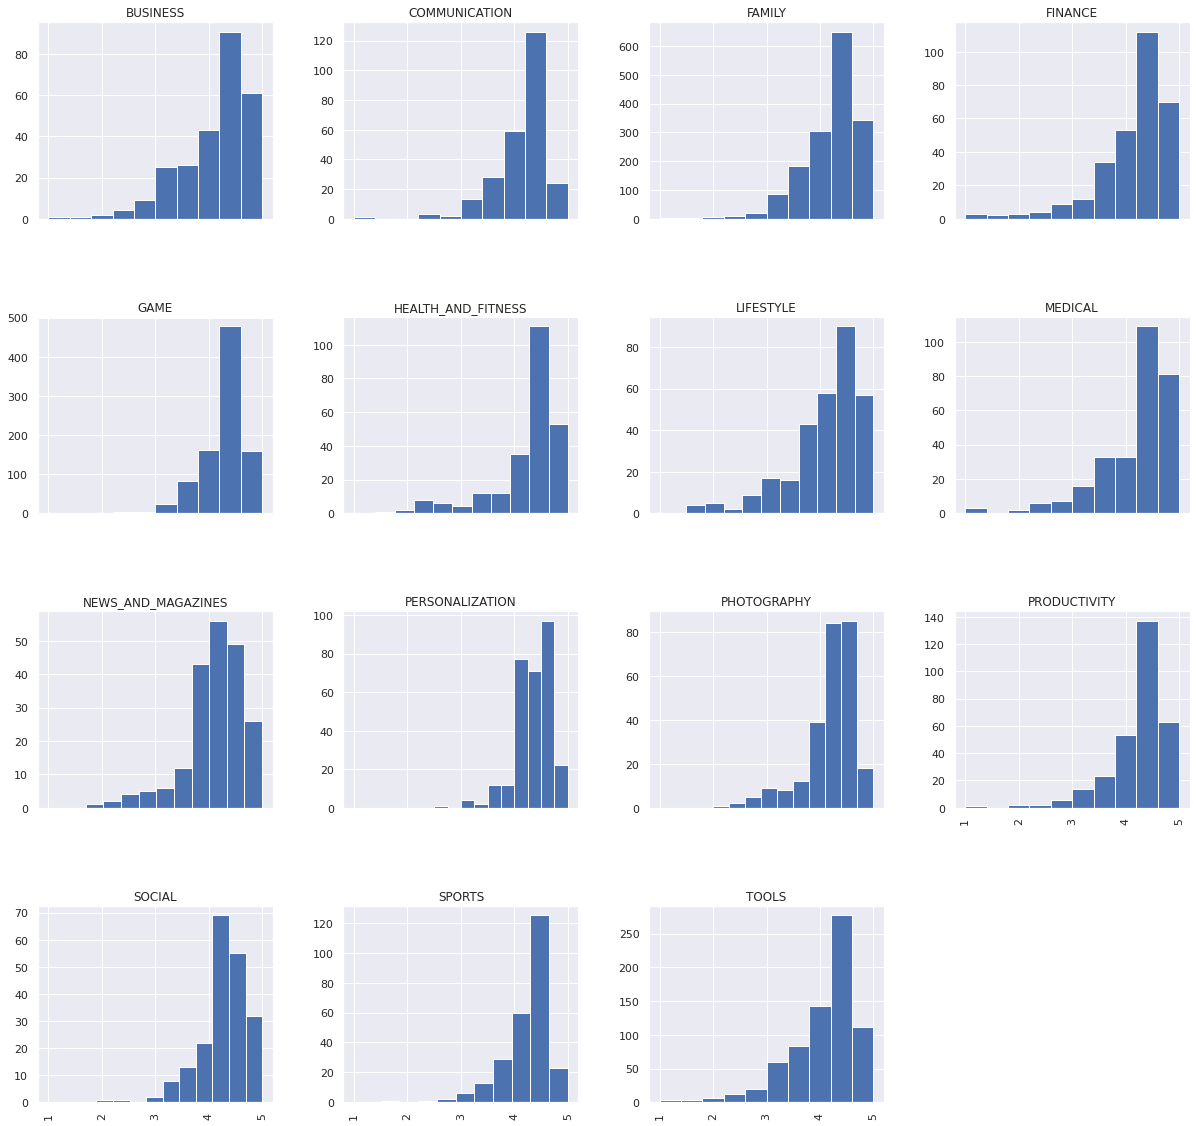

In [47]:
top_categories = play_store_df.groupby("Category").filter(lambda x: len(x) > 200).reset_index()
array = top_categories['Rating'].hist(by=top_categories['Category'], sharex=True, figsize=(20,20))

[Text(0, 0, 'BUSINESS'),
 Text(0, 0, 'COMMUNICATION'),
 Text(0, 0, 'FINANCE'),
 Text(0, 0, 'HEALTH_AND_FITNESS'),
 Text(0, 0, 'LIFESTYLE'),
 Text(0, 0, 'GAME'),
 Text(0, 0, 'FAMILY'),
 Text(0, 0, 'MEDICAL'),
 Text(0, 0, 'SOCIAL'),
 Text(0, 0, 'SHOPPING'),
 Text(0, 0, 'PHOTOGRAPHY'),
 Text(0, 0, 'SPORTS'),
 Text(0, 0, 'TRAVEL_AND_LOCAL'),
 Text(0, 0, 'TOOLS'),
 Text(0, 0, 'PERSONALIZATION'),
 Text(0, 0, 'PRODUCTIVITY'),
 Text(0, 0, 'NEWS_AND_MAGAZINES')]

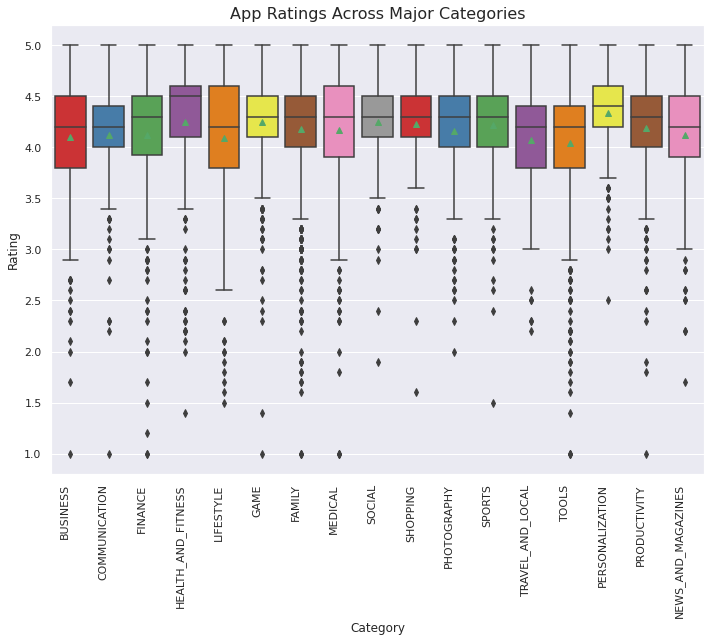

In [48]:
topcat = play_store_df.groupby('Category').filter(lambda x: len(x) >= 170).reset_index()
topcat.head()
sns.set_style("darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.title("App Ratings Across Major Categories", fontsize=16)
ax = sns.boxplot(x='Category', y='Rating', data=topcat, palette='Set1', showmeans=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

**`Finding`**
* The rating distribution revealed that most apps perform reasonably well with an average rating of 4.17. 
* We broke down the average rating by category to check if any category performs exceedingly good or bad. 
* Also, we conducted a One-way Anova Test and confirmed that the average ratings across categories is statistically different. 
* The Health and Fitness is the best apps and other apps with 50% apps having a rating greater than 4.5. Interestingly, half of the Dating apps have a rating lower than the average.
---



### 7. Basic Sentiment Analysis from User Reviews dataset

In [49]:
## Merge the two datasets
merged_df = play_store_df.merge(user_ratings_df, on = "App")
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


In [50]:
## Drop the NA values
merged_df = merged_df.dropna(subset=['Translated_Review'])

In [51]:
## let's see the distribution of postive, neg reviews in each category
sentiment_count = merged_df.groupby(["Category","Sentiment"]).agg({'App': 'count'}).reset_index()
sentiment_sum =  merged_df.groupby(['Category']).agg({'Sentiment': 'count'}).reset_index()
print(sentiment_sum.head())
print(sentiment_count.head())

              Category  Sentiment
0       ART_AND_DESIGN        382
1    AUTO_AND_VEHICLES        289
2               BEAUTY        338
3  BOOKS_AND_REFERENCE        651
4             BUSINESS       1082
            Category Sentiment  App
0     ART_AND_DESIGN  Negative   61
1     ART_AND_DESIGN   Neutral   62
2     ART_AND_DESIGN  Positive  259
3  AUTO_AND_VEHICLES  Negative   17
4  AUTO_AND_VEHICLES   Neutral   36


In [52]:
## we need to normalize it before plotting
new_df = sentiment_count.merge(sentiment_sum, on = "Category")
new_df["normalized_sentiment_counts"] = new_df["App"]/new_df["Sentiment_y"]
new_df.head()

,Category,Sentiment_x,App,Sentiment_y,normalized_sentiment_counts
0,ART_AND_DESIGN,Negative,61,382,0.159686
1,ART_AND_DESIGN,Neutral,62,382,0.162304
2,ART_AND_DESIGN,Positive,259,382,0.678010
3,AUTO_AND_VEHICLES,Negative,17,289,0.058824
4,AUTO_AND_VEHICLES,Neutral,36,289,0.124567


In [53]:
sentiment_count_2 = merged_df.groupby(["Category","Sentiment","Installs"]).agg({'App': 'count'}).reset_index()
sentiment_sum_2 =  merged_df.groupby(['Category']).agg({'Sentiment': 'count'}).reset_index()
sentiment_count_2.head()

,Category,Sentiment,Installs,App
0,ART_AND_DESIGN,Negative,100000.0,23
1,ART_AND_DESIGN,Negative,500000.0,22
2,ART_AND_DESIGN,Negative,1000000.0,10
3,ART_AND_DESIGN,Negative,5000000.0,3
4,ART_AND_DESIGN,Negative,10000000.0,3


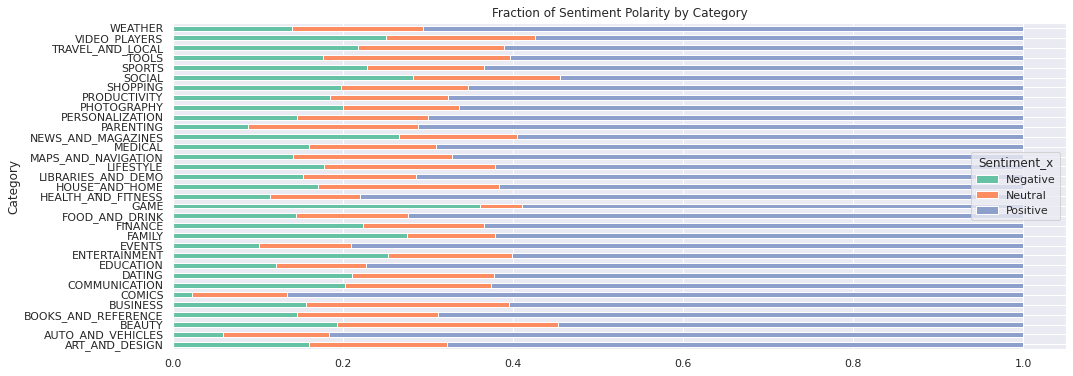

In [54]:
new_df_stack = new_df.pivot(index='Category', columns='Sentiment_x', values='normalized_sentiment_counts')
from pylab import rcParams
rcParams['figure.figsize'] = 16, 6
sns.set(palette="Set2")
new_df_stack.plot(kind='barh', stacked = True)
plt.title("Fraction of Sentiment Polarity by Category")
plt.savefig("sentiment_dist.svg", format='svg', dpi=1200)

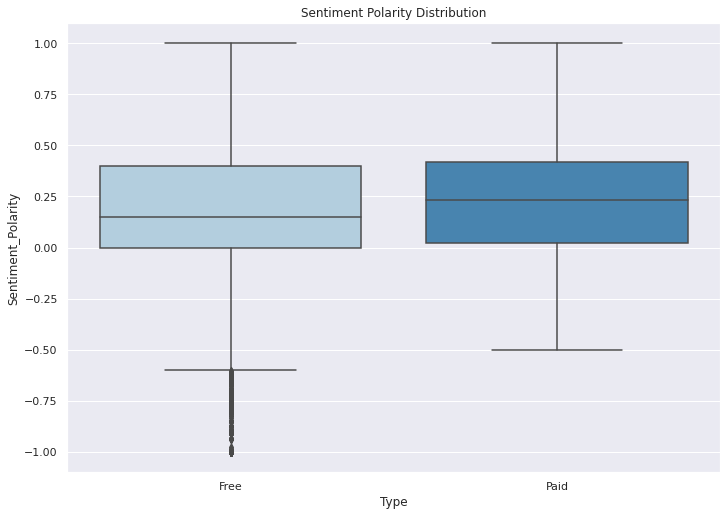

In [55]:
## sentiment polarity and free/paid apps
#sns.set_style('ticks')
sns.set_style("darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.boxplot(x='Type', y='Sentiment_Polarity', data=merged_df, palette='Blues')
title = ax.set_title('Sentiment Polarity Distribution')

**`Finding`**
* We plotted the fraction of positive, negative and neutral reviews for each category and observed that the Health and Fitness apps perform the best with more than 85% positive reviews. 
* On the other hand, Game and Social apps have a higher fraction of negative reviews. 
* We compared the reviews between free and paid apps and found that people are harsher towards free apps whereas users are more tolerant when they are paying for it.


---



# **CONCLUSION:**

* Average rating of (`active`) apps on Google Play Store is `4.17`.
* Users prefer to pay for apps that are `light-weighted`. Thus, a paid app that is `higher in size` may not perform well in the market.
* Most of the top rated apps are optimally sized between `~2MB to ~40MB` - neither too light nor too heavy.
* Most of the top rated apps are optimally priced between `~1$ to ~30$` - neither too cheap nor too expensive.
* `Medical and Family` apps are the most expensive and even extend upto `80$`.
* Users tend to download a given app more if it has been reviewed by a large number of people.
* `Health and Fitness` apps receive more than `85%` positive reviews. 
* `Game and Social` apps receive mixed feedback `50%` positive and `50%` negative.



---

*Thank you for staying with me till the end. Please let know your suggestions.* 😃

---

